# Homework 5 - Machine Learning I


## Deadline: October 19th, at noon (12:00)

#### About this homework

In this homework, we will get familiar with KNN classification with different metrics, and the decision tree. Before solving these tasks, please make sure that you have looked through the slides of Lecture 06.

#### General instructions

Please look up the general instructions about homeworks in the first homework.

#### Tracking your time

We will appreciate if you track your time spent on solving the homework and report it in the dedicated cells at the end of the homework. This is not compulsory and does not affect your grade in any way. The collected information will be used to improve future homeworks.

# Task 1. KNN  (1.2 points)

Explain the K-Nearest Neighbour (K-NN) algorithm on the toy dataset given below. Please use the Euclidean distance in tasks 1a-1e.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
plt.style.use('seaborn-whitegrid') # Optional styling
plt.rcParams.update({'font.size': 14}) # Change font size

In [3]:
data = pd.DataFrame(
    {'x':[1,3,2,3,1,4,9,5,6,6,9],
    'y':[7,9,4,3,8,1,3,6,4,2,9],
    'label':  ['cat']*5 + ['dog']*6})
data

,x,y,label
0,1,7,cat
1,3,9,cat
2,2,4,cat
3,3,3,cat
4,1,8,cat
5,4,1,dog
6,9,3,dog
7,5,6,dog
8,6,4,dog
9,6,2,dog


**a. First, visualize the dataset in x, y coordinates and add a label to each point. Second, add an unlabelled test instance to coordinates (3, 4.5).** <br>
<details>
    <summary>Show hint</summary>
    You can use <code>plt.plot(*[x,y])</code> to add a point
</details>

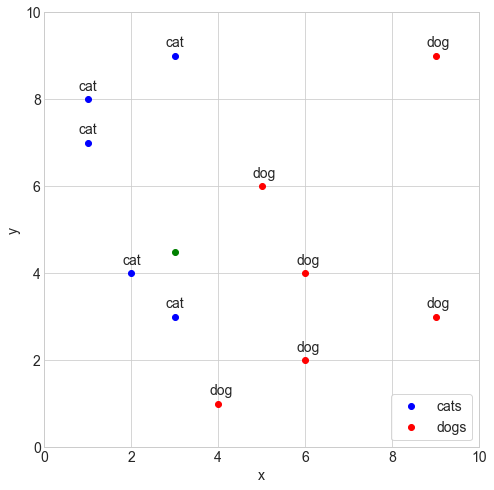

In [4]:
unlabelled_test_instance = [3, 4.5]

def plot_points(data):
    
    # Specify figure parameters
    fig, ax = plt.subplots(figsize=(8, 8)) 
    ax.set_aspect('equal')
    
    # Data to plot
    ax.plot(data.loc[data.label == 'cat', 'x'], data.loc[data.label == 'cat', 'y'], 'bo', label='cats') 
    ax.plot(data.loc[data.label == 'dog', 'x'], data.loc[data.label == 'dog', 'y'], 'ro', label='dogs')

    # Axis labels
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    
    # Specify axes parameters
    ax.set_xlim(0, 10)
    ax.set_ylim(0, 10)
    
    plt.legend(markerscale=1, frameon=True, loc='lower right', facecolor='white')

    for i, label in enumerate(data.label):
        # TODO: add labels to each data point
        x = data['x'][i]
        y = data['y'][i]
        plt.annotate(label, xy=(x-0.2, y+0.2)) 
    
    return ax

plot_points(data) # uncomment to visualize the dataset

# TODO
plt.plot(*[unlabelled_test_instance[0],unlabelled_test_instance[1]], 'go')# uncomment and fill in the code to plt the unlabelled test instance

#those are radiuses for unlabelled_test_instance
#cir1 = plt.Circle((unlabelled_test_instance[0], unlabelled_test_instance[1]), 1, color='r',fill=False)
#cir7 = plt.Circle((unlabelled_test_instance[0], unlabelled_test_instance[1]), 7, color='r',fill=False)
#cir11 = plt.Circle((unlabelled_test_instance[0], unlabelled_test_instance[1]), 11, color='r',fill=False)

#plot_points(data).add_artist(cir1)
#plot_points(data).add_artist(cir7)
#plot_points(data).add_artist(cir11)

plt.show()

**b. How is the test instance (given in 1a) classified when K = 1, K = 7 and K = 11. Note: you don’t have to calculate the distances if the visualization is clear enough to identify the K closest neighbours.**

**<font color='red'>1-NN:</font>** 0 points, no label can be predicted.

**<font color='red'>7-NN:</font>** 10 points: 5 'dog' and 5 'cat', 50% label 'dog' / 50% label 'cat'. We can predict either 'dog' or 'cat'.

**<font color='red'>11-NN:</font>** 11 points: 6 'dog', 5 'cat', 55% label 'dog' / 45% label 'cat'. 55% is majority, so we predict 'dog'.

**c. When using KNN in a binary classification task, would you prefer the parameter K to be an odd or even number? Explain why.**

**<font color='red'>Answer:</font>** Odd, because I want to avoid ties between labels (2 labels have same score)

**d. Next please use KNeighborsClassifier from the sklearn package. Add the missing code in the last cell below and then run the cells and analyze the following plots for K=1,3,5,7,9,11. The colored regions cover locations where a point is classified a dog (red) or a cat (blue). Does your answer from 1b match with these results?**

In [5]:
from sklearn.neighbors import KNeighborsClassifier

In [6]:
def create_grid():
    x = np.arange(0, 11, 0.1)
    y = np.arange(0, 11, 0.1)
    xx, yy = np.meshgrid(x, y)
    X_grid = pd.DataFrame({'x':xx.flatten(),'y':yy.flatten()}) # Generates all possible combinations
    return X_grid

def plot_model(ax,X_train,y_train,X_grid,model):
    y_pred = model.predict(X_grid)
    
    if (len(X_grid[y_pred=='dog']) > 0 ):
        X_grid[y_pred=='dog'].plot(x='x',y='y',kind='scatter',s=20,color='red', ax=ax, alpha=0.2, zorder=-1)
    
    if (len(X_grid[y_pred=='cat']) > 0 ):
        X_grid[y_pred=='cat'].plot(x='x',y='y',kind='scatter',s=20,color='blue', ax=ax, alpha=0.2, zorder=-1)
    
    X_train[y_train=='dog'].plot(x='x',y='y',kind='scatter',s=40,color='pink', ax=ax, alpha=0.2, zorder=-1)
    X_train[y_train=='cat'].plot(x='x',y='y',kind='scatter',s=40,color='lightblue', ax=ax, alpha=0.2, zorder=-1);

In [7]:
def plot_decision_boundaries(model, data):
    X_train = data[['x','y']]
    y_train = data.label
    ax = plot_points(data)
    X_grid = create_grid()
    model = model.fit(X_train, y_train)
    plot_model(ax, X_train, y_train, X_grid, model)

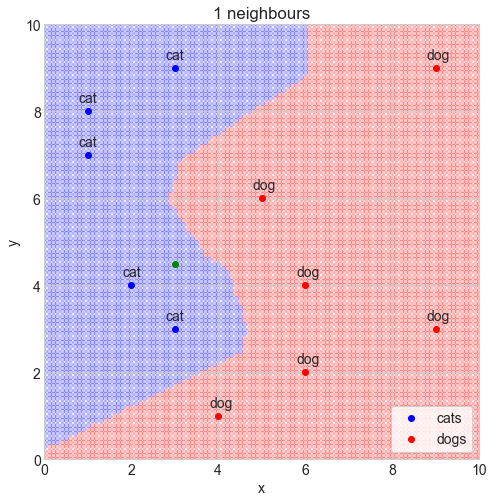

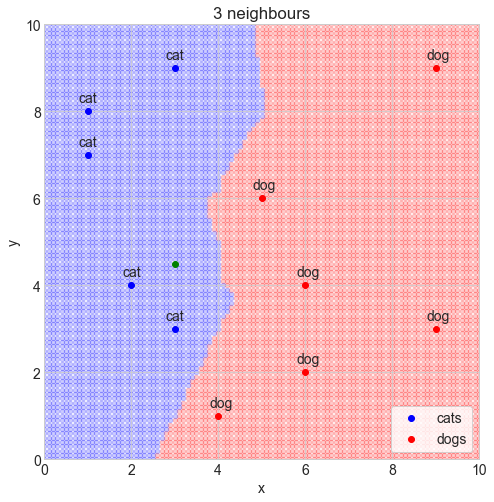

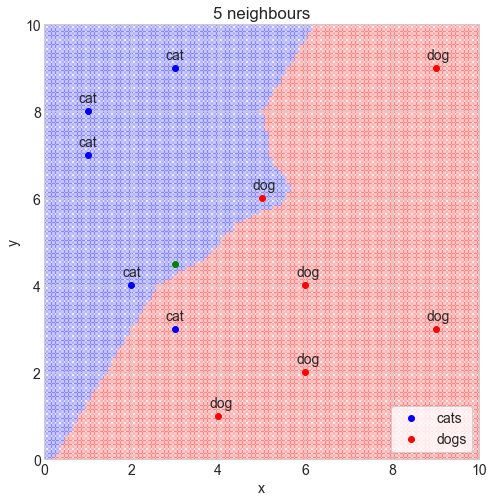

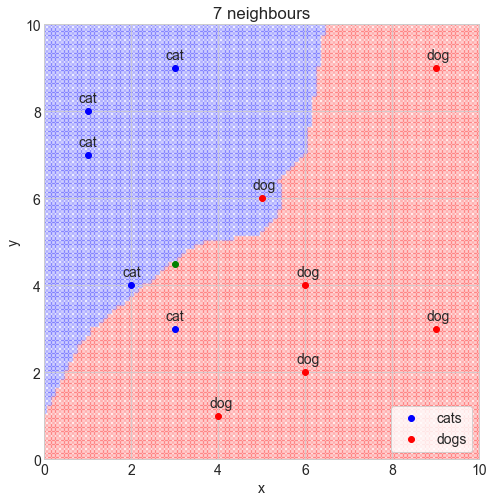

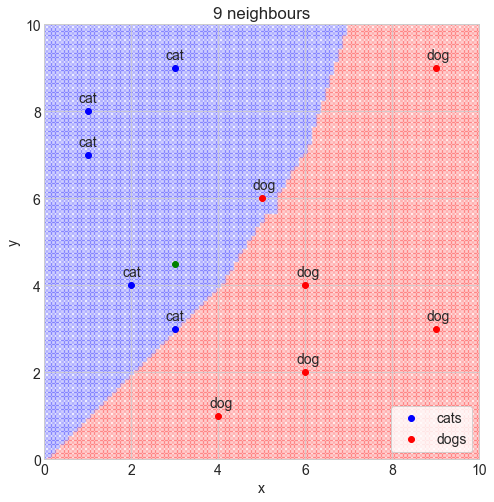

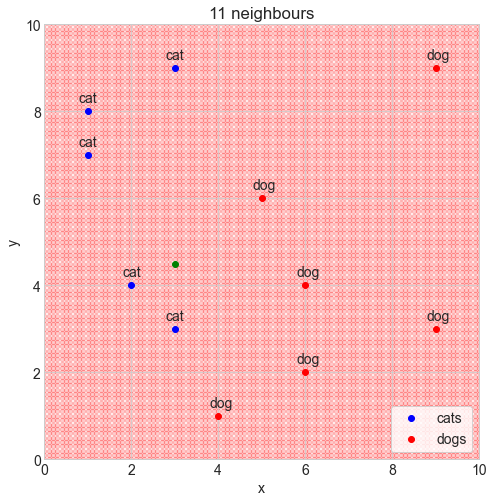

In [8]:
for i in range(1, 12, 2):
    # TODO
    model = KNeighborsClassifier(n_neighbors=i)                             # uncomment and fill in
    plot_decision_boundaries(model, data)   # uncomment
    
    # TODO - add the same unlabelled test instance as in 1a
    plt.plot(*[unlabelled_test_instance[0],unlabelled_test_instance[1]], 'go')                           # uncomment and fill in
    
    plt.legend(markerscale=1, frameon=True, loc='lower right')
    plt.title('{} neighbours'.format(i))
    plt.show()

**<font color='red'>Answer:</font>** No, in K=7, in 1b, there is 50%/50% and here is it lower for 'cat'.

**e. Why doesn't it make sense to use K larger than 11 in our dataset?**

**<font color='red'>Answer:</font>** Because then it covers all the plot and 'dogs' will be obviously predicted, because it is majority.

**f. Run the same code again, but use Manhattan distance (also known as city block distance) instead of Euclidean. Is the unknown point classified the same way with different values for K? Please report, how the point is classified with each K and if the prediction is the same as with Euclidean distance.** <br> 
Hint 1: Look at KNeighborsClassifier documentation for how to change the distance metric. Notice that, even though the default distance metric is 'Minkowski', the p parameter defaults to 2, which makes it equivalent to Euclidean distance.

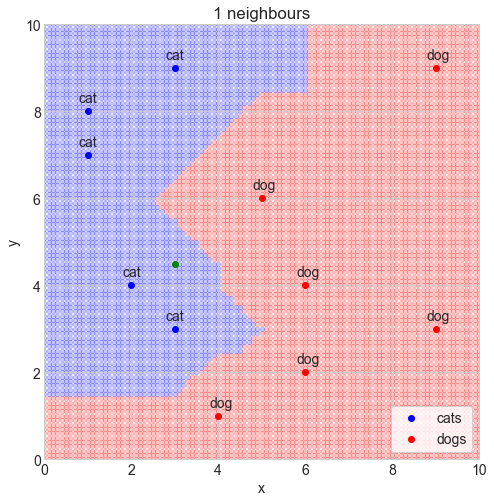

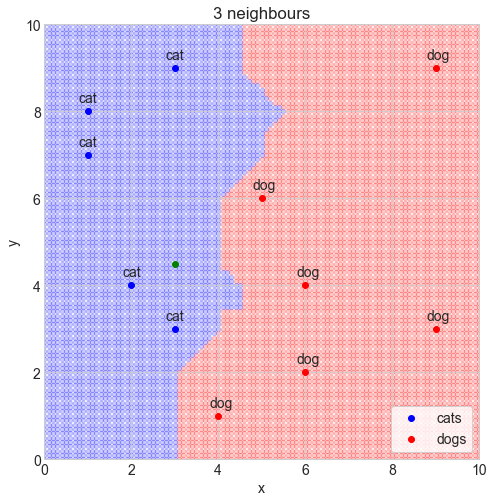

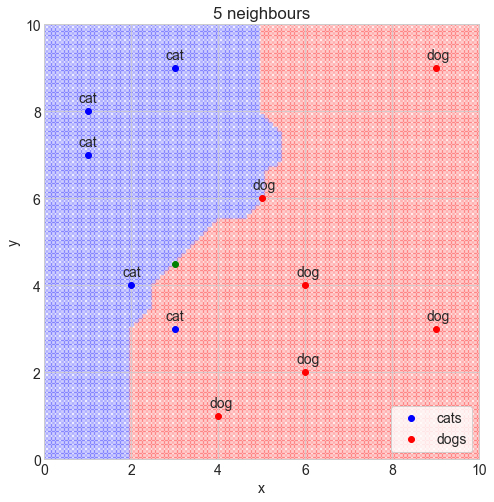

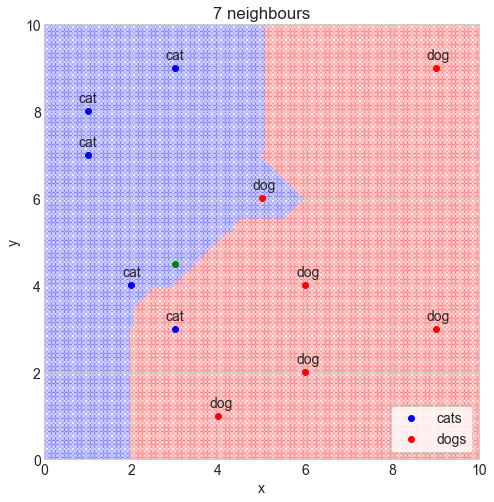

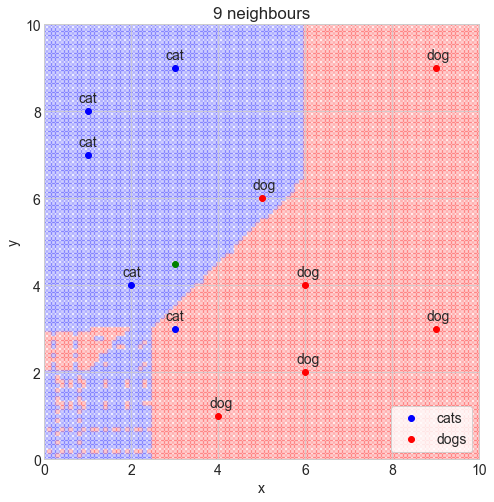

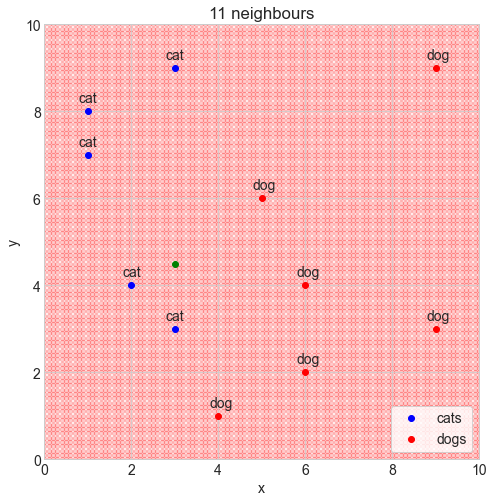

In [9]:
for i in range(1, 12, 2):
    # TODO
    model = KNeighborsClassifier(n_neighbors=i, metric='manhattan') # uncomment and fill in
    plot_decision_boundaries(model, data)                   # uncomment
    
    # TODO - add the unlabelled test instance like in 1a
    plt.plot(*[unlabelled_test_instance[0],unlabelled_test_instance[1]], 'go')                                           # uncomment and fill in
    
    plt.legend(markerscale=1, frameon=True, loc='lower right')
    plt.title('{} neighbours'.format(i))
    plt.show()

**<font color='red'>1-NN:</font>** Prediction is the same.

**<font color='red'>3-NN:</font>** Prediction is the same.

**<font color='red'>5-NN:</font>** Dog is in the blue area, prediction differs.

**<font color='red'>7-NN:</font>** unlabelled_test_instance is in blue area, prediction differs.

**<font color='red'>9-NN:</font>** Cat is in the red area, prediction differs.

**<font color='red'>11-NN:</font>** Prediction is the same.

# Task 2. KNN with the digits dataset (1 point)

In this task you have to deal with the digits dataset provided by `sklearn.datasets`. There are a total of 1797 grayscale images of size 8x8.

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits # More info at http://scikit-learn.org/stable/datasets/index.html

digits = load_digits()
labels = digits.target
pixels_data = digits.data

**a. Split the data into train and test set. Training data should include 70% of the images. Use <code>train_test_split</code> from <code>sklearn.model_selection</code>. Use <code>random_state=0</code> to get the same results each time. Print out the number of instances in the test set. Recall from the lecture that X is called the features (in this case, 8x8 images of digits) and y are called the labels or, for training data, the target values (in this case, at what digit each image actually corresponds).**

In [11]:
from sklearn.model_selection import train_test_split

# TODO
X_train, X_test, y_train, y_test = train_test_split(pixels_data, labels, test_size=0.30, random_state=0)  # uncomment and fill in
print(len(X_test))                               # uncomment and fill in to print the size of the test set

540


**b. Use KNeighborsClassifier from sklearn to train a 1-NN model (K=1) using the Euclidean distance (it is the default metric). Calculate and report the accuracy on the test data from subtask 2a. For that, predict labels for each image from the test set using <code>model.predict()</code> and compare them with the actual labels. Recall from the lecture that fitting a model, in this case,  means adjusting the model parameters with the training data so that it becomes capable of performing your task of interest, and predicting means, in this case, asking your trained model what are the labels of your data of interest. Accuracy is the proportion of correct predictions out of all test instances. Create a dataframe with two columns called `model` and `accuracy`. Insert the name of your model (`1-NN`) and its accuracy into the first row of the dataframe. In tasks 3 and 4 you will add more rows into this dataframe, representing results from other models. Print out the dataframe.**<br>
<details>
<summary>
    Show hint 1
</summary>
    You can use <code>accuracy_score</code> from <code>sklearn.metrics</code> to calculate accuracy. 
</details>
<details>
<summary>
    Show hint 2
</summary>
    You can use <code>pandas.DataFrame.append</code> to add rows. 
</details>

In [12]:
from sklearn.metrics import accuracy_score
results_df = pd.DataFrame(columns=['model', 'accuracy'])

# TODO: uncomment and fill in
#1NN
model = KNeighborsClassifier(n_neighbors = 1)
model.fit(X_test, y_test)
acc = accuracy_score(labels, model.predict(pixels_data))
results_df = results_df.append({'model': "1NN", 'accuracy': acc}, ignore_index=True)
#print out the dataframe
print(results_df)

  model  accuracy
0   1NN  0.985531


**c. Train 3 different models using Euclidean distance with different values for K (Choose the values for K yourself). Calculate the accuracy for each considered K and insert these accuracies together with model names into the dataframe as new rows. Print out the dataframe.** <br>

In [13]:
# TODO
#3NN
model = KNeighborsClassifier(n_neighbors = 3)
model.fit(X_test, y_test)
acc_3 = accuracy_score(labels, model.predict(pixels_data))
results_df = results_df.append({'model': "3NN", 'accuracy': acc_3}, ignore_index=True)

#5NN
model = KNeighborsClassifier(n_neighbors = 5)
model.fit(X_test, y_test)
acc_5 = accuracy_score(labels, model.predict(pixels_data))
results_df = results_df.append({'model': "5NN", 'accuracy': acc_5}, ignore_index=True)

#7NN
model = KNeighborsClassifier(n_neighbors = 7)
model.fit(X_test, y_test)
acc_7 = accuracy_score(labels, model.predict(pixels_data))
results_df = results_df.append({'model': "7NN", 'accuracy': acc_7}, ignore_index=True)

print(model)
print(results_df)

KNeighborsClassifier(n_neighbors=7)
  model  accuracy
0   1NN  0.985531
1   3NN  0.982193
2   5NN  0.978297
3   7NN  0.969393


**d. Insert 4 more models into your dataframe using the same K as in 2b and 2c, but change the distance metric to Manhattan. Print out the dataframe.**

In [14]:
# TODO

#3NN-MHT
model = KNeighborsClassifier(n_neighbors = 3, metric='manhattan')
model.fit(X_test, y_test)
acc_3mht = accuracy_score(labels, model.predict(pixels_data))
results_df = results_df.append({'model': "3NN-MHT", 'accuracy': acc_3mht}, ignore_index=True)

#5NN-MHT
model = KNeighborsClassifier(n_neighbors = 5, metric='manhattan')
model.fit(X_test, y_test)
acc_5mht = accuracy_score(labels, model.predict(pixels_data))
results_df = results_df.append({'model': "5NN-MHT", 'accuracy': acc_5mht}, ignore_index=True)

#7NN-MHT
model = KNeighborsClassifier(n_neighbors = 7, metric='manhattan')
model.fit(X_test, y_test)
acc_7mht = accuracy_score(labels, model.predict(pixels_data))
results_df = results_df.append({'model': "7NN-MHT", 'accuracy': acc_7mht}, ignore_index=True)

#9NN-MHT
model = KNeighborsClassifier(n_neighbors = 9, metric='manhattan')
model.fit(X_test, y_test)
acc_9mht = accuracy_score(labels, model.predict(pixels_data))
results_df = results_df.append({'model': "9NN-MHT", 'accuracy': acc_9mht}, ignore_index=True)

print(results_df)

     model  accuracy
0      1NN  0.985531
1      3NN  0.982193
2      5NN  0.978297
3      7NN  0.969393
4  3NN-MHT  0.978297
5  5NN-MHT  0.972732
6  7NN-MHT  0.962159
7  9NN-MHT  0.953255


**e. Print out the dataframe sorted by accuracy. Which of the measures (Euclidean or Manhattan distance) worked better on our dataset?** <details>
<summary>Show hint</summary>
    You can use <code>df.sort_values()</code> to sort the dataframe by accuracy
</details>

In [15]:
# TODO Sort by accuracy
print(results_df.sort_values(['accuracy'], ascending=False))

     model  accuracy
0      1NN  0.985531
1      3NN  0.982193
2      5NN  0.978297
4  3NN-MHT  0.978297
5  5NN-MHT  0.972732
3      7NN  0.969393
6  7NN-MHT  0.962159
7  9NN-MHT  0.953255


**<font color='red'>Answer:</font>** Euclidean measure worked better for this dataset.

# Task 3. Decision tree with digits dataset (0.8 points)

Instead of KNN we can also use decision trees to classifiy digits. Use the same training and test data that you generated in subtask 2a and train a decision tree.<br>
Our data cointains 8x8 images, each pixel having a value between 0..16 and we can think of these as numeric features.

**a. Train a decision tree using <code>DecisionTreeClassifier()</code> from sklearn package. Set the <code>random_state = 0</code> and use Gini impurity <code>criterion='gini'</code>. Calculate and report the accuracy of your model. Append the name of the model and the accuracy into the dataframe from the previous task.** <br>

In [16]:
from sklearn.tree import DecisionTreeClassifier
# TODO
X_train, X_test, y_train, y_test = train_test_split(pixels_data, labels, test_size=0.30, random_state=0) 
model = DecisionTreeClassifier(random_state=0, criterion='gini')
model.fit(X_test, y_test)
acc_dt = accuracy_score(labels, model.predict(pixels_data))
results_df = results_df.append({'model': "DecisionTree", 'accuracy': acc_dt}, ignore_index=True)
print(results_df)

          model  accuracy
0           1NN  0.985531
1           3NN  0.982193
2           5NN  0.978297
3           7NN  0.969393
4       3NN-MHT  0.978297
5       5NN-MHT  0.972732
6       7NN-MHT  0.962159
7       9NN-MHT  0.953255
8  DecisionTree  0.875904


**<font color='red'>Accuracy:</font>** Accuracy of decision tree is ~87,6%, which is lower, than all predicts in last task.

**b. Train a new decision tree model, but set the <code>random_state=3</code>. Calculate and report the accuracy. Append the name of the model and the accuracy into a dataframe from task 2.** <br>

In [17]:
# TODO
model = DecisionTreeClassifier(random_state=3, criterion='gini')
model.fit(X_test, y_test)
acc_dt_3 = accuracy_score(labels, model.predict(pixels_data))
results_df = results_df.append({'model': "DecisionTree_RS3", 'accuracy': acc_dt_3}, ignore_index=True)
print(results_df)

              model  accuracy
0               1NN  0.985531
1               3NN  0.982193
2               5NN  0.978297
3               7NN  0.969393
4           3NN-MHT  0.978297
5           5NN-MHT  0.972732
6           7NN-MHT  0.962159
7           9NN-MHT  0.953255
8      DecisionTree  0.875904
9  DecisionTree_RS3  0.874791


**<font color='red'>Accuracy:</font>** Accuracy is ~87,5%.

**c. How much did the accuracy change? Write what do you think should be the reason for the change in accuracy?** <br> 

In [18]:
# TODO
print((acc_dt - acc_dt_3))

0.0011129660545353692


**<font color='red'>Difference in accuracies:</font>** Accuracy lowered in 0.113%.

**<font color='red'>Reason:</font>** Random state affects model, because of that accuracy is also affected.

P.S. I also tried other random_state and some of them had higher accuracy.

**d. Train a new decision tree model but this time use Entropy (<code>criterion='entropy'</code>) for choosing the best split and set <code>random_state=0</code>.  Calculate and report the accuracy. Append the name of the model and the accuracy into the dataframe from task 2.** <br>

In [19]:
# TODO
model = DecisionTreeClassifier(random_state=0, criterion='entropy')
model.fit(X_test, y_test)
acc_dt_entropy = accuracy_score(labels, model.predict(pixels_data))
results_df = results_df.append({'model': "DecisionTree_Entropy", 'accuracy': acc_dt_entropy}, ignore_index=True)
print(results_df)

                   model  accuracy
0                    1NN  0.985531
1                    3NN  0.982193
2                    5NN  0.978297
3                    7NN  0.969393
4                3NN-MHT  0.978297
5                5NN-MHT  0.972732
6                7NN-MHT  0.962159
7                9NN-MHT  0.953255
8           DecisionTree  0.875904
9       DecisionTree_RS3  0.874791
10  DecisionTree_Entropy  0.871452


**<font color='red'>Accuracy:</font>** Accuracy is ~87,1%.

**e. Often it is better to stop splitting if the node becomes small (<10 or even <20 instances), even if the node is not yet pure. Set the  <code>min_samples_leaf = 10</code> and train a new decision tree model, again using entropy  <code>criterion='entropy'</code> and set <code>random_state=0</code>. Calculate and report the accuracy. Append the name of the model and the accuracy into the dataframe from task 2.** 

In [20]:
# TODO
model = DecisionTreeClassifier(random_state=0, criterion='entropy', min_samples_leaf=10)
model.fit(X_test, y_test)
acc_dt_entropy_10leaf = accuracy_score(labels, model.predict(pixels_data))
results_df = results_df.append({'model': "DecisionTree_Entropy_10Leaf", 'accuracy': acc_dt_entropy_10leaf}, ignore_index=True)
print(results_df)

                          model  accuracy
0                           1NN  0.985531
1                           3NN  0.982193
2                           5NN  0.978297
3                           7NN  0.969393
4                       3NN-MHT  0.978297
5                       5NN-MHT  0.972732
6                       7NN-MHT  0.962159
7                       9NN-MHT  0.953255
8                  DecisionTree  0.875904
9              DecisionTree_RS3  0.874791
10         DecisionTree_Entropy  0.871452
11  DecisionTree_Entropy_10Leaf  0.796327


**<font color='red'>Accuracy:</font>** Accuracy is ~79,6%.

# Task 4. Compare models (0.5 points)

Which model was the best for classifing digits if you compare all KNN models from task 2 and the decision tree models from task 3.

**a. Using the dataframe you generated in tasks 2 and 3, draw a bar plot with accuracy on the y axis and name of the model on the x axis. Sort the results by accuracy.**<br>
<details>
<summary>Show hint</summary>
    You can use <code>df.sort_values()</code> to sort the dataframe by accuracy
</details>

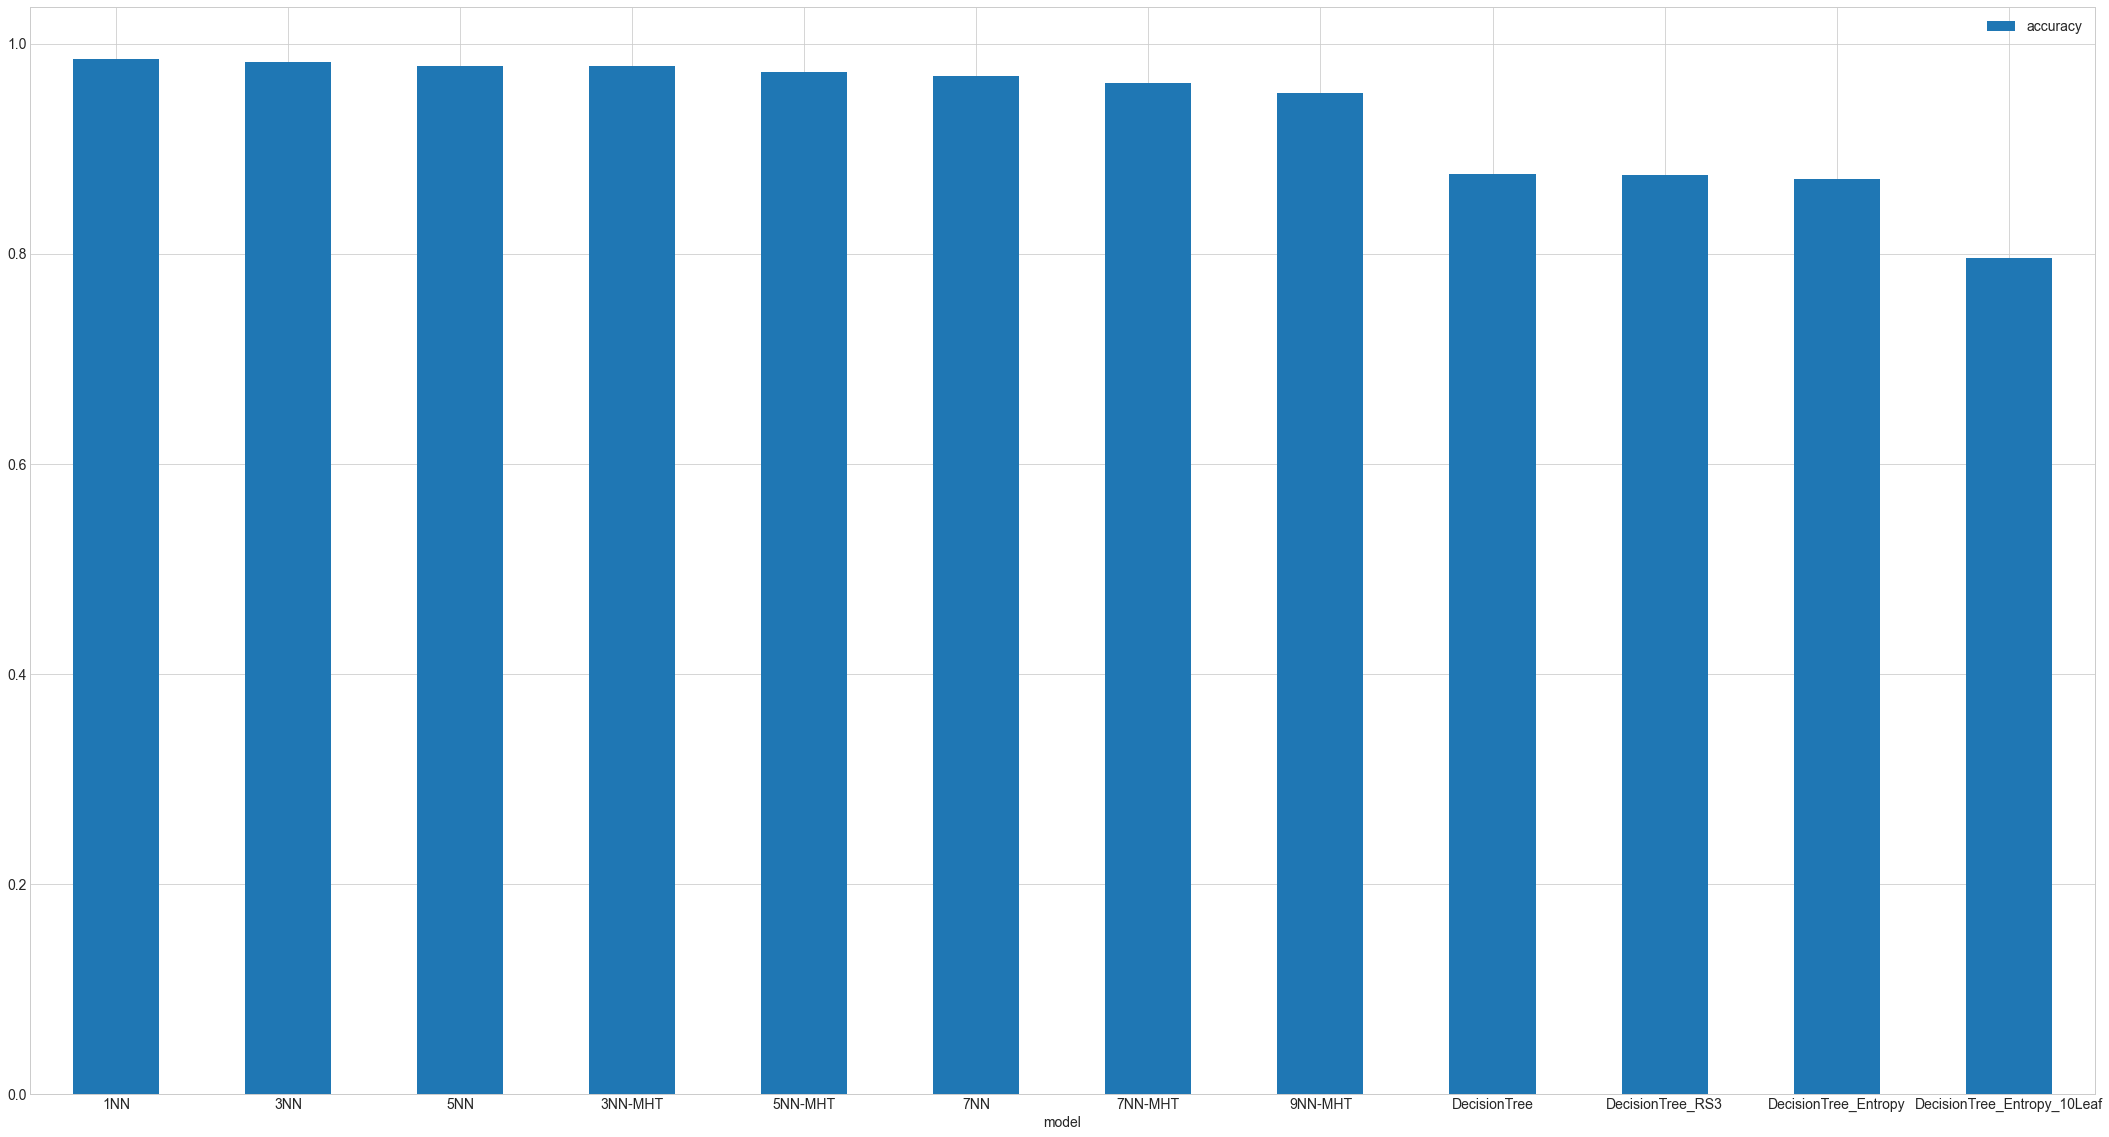

In [21]:
# TODO
results_df = results_df.sort_values(['accuracy'], ascending=False)

ax = results_df.plot.bar(x='model', y='accuracy', rot=0, figsize=(37,20))

#print(results_df)

**b. Which of your models from tasks 2 and 3 gave the best accuracy? Please report the model and the accuracy.**

**<font color='red'>Answer:</font>** 2 task: 1NN, acc = ~98,6%.
\
3 task: DecisionTree, acc= ~87,6%.

# Task 5. Decision tree for Titanic data (0.5 points)

For this task we will use the Titanic dataset from Homework 3. We are going to use the whole dataset and train a decision tree classifier to predict whether a passenger survived or not.

In [22]:
titanic_df = pd.read_csv("titanic.csv")
titanic_df.head(5)

FileNotFoundError: [Errno 2] No such file or directory: 'titanic.csv'

The decision tree implementation in ```sklearn``` requires all features to be numeric. We will therefore create a new binary feature for each value of each textual variable. This process is called one-hot encoding. 

In [ ]:
titanic_df = pd.get_dummies(titanic_df, columns = ["Age", "Sex", "Class"])

Let's extract target values and feature values.

In [ ]:
labels = titanic_df['Survived']
features = titanic_df.drop('Survived', axis=1)

Train a decision tree model, using "Survived" column as label and other attributes as features.

In [ ]:
from sklearn.tree import DecisionTreeClassifier

titanic_model = DecisionTreeClassifier(random_state=0, criterion='gini')
titanic_model = titanic_model.fit(features, labels)

#### Visualizing the tree

For visualizing the tree that our model has learned, we need to install ```graphviz``` package. Run ```pip install graphviz```. However, using this library might need some manual configuration, depending on your operating system. __[Click here for how to troubleshoot graphviz](https://stackoverflow.com/questions/35064304/runtimeerror-make-sure-the-graphviz-executables-are-on-your-systems-path-aft)__. If you are using a conda environment, try running both ```pip install graphviz``` and ```conda install graphviz```.

<details>
    <summary>An alternative approach</summary>
    <code>from sklearn.tree import plot_tree</code><br>
    <code>plt.figure(figsize=(20,10))</code><br>
    <code>plot_tree(titanic_model,feature_names=features.columns,filled=True)</code><br>
    <code>plt.show()</code>
</details>

In [ ]:
from sklearn import tree

from sklearn.tree import plot_tree
plt.figure(figsize=(20,10))
plot_tree(titanic_model,feature_names=features.columns,filled=True)
plt.show()

#import graphviz

In [ ]:
#dot_data = tree.export_graphviz(titanic_model, out_file=None,
#                                feature_names=titanic_df.drop('Survived', axis=1).columns,  
#                                class_names=True,
#                                filled=True, rounded=True, 
#                                special_characters=False) 
#graph = graphviz.Source(dot_data)
#graph

Look at the tree and its nodes. 

**a. What does the background colour signify in the nodes? Explain your reasoning.**

**<font color='red'>Meaning of blue:</font>** There are more people who came out alive rather than dead.

**<font color='red'>Meaning of orange:</font>** There are more people who came out dead rather than alive.

**<font color='red'>Meaning of ivory:</font>** Number of people who came out dead and alive is nearly same.

**b. What does it mean when ```Class_3rd <= 0.5``` is true?**

**<font color='red'>Answer:</font>** More than half people from the samples were NOT in the 3rd class.

It shows wheter is person from 3rd calss or not.

**c. What does the "value" attribute show in each node?**

**<font color='red'>Answer:</font>** Right side: how many people survived, left side: how many people died.

# Task B1 (OPTIONAL BONUS TASK). Experiments with decision trees on Titanic dataset (up to 2 points).

This task is a bonus task, meaning that you can earn bonus points that will be added to your homework, project and exam points. For example, if you get 89 points in total from homework, project and exam, but you have earned 2 bonus points from your homeworks, then you get the grade `A` because your final score will be 89+2=91.


In the current bonus task you will earn 1 bonus point for doing all that you have been asked to do. **No points will be given for partial answers**. Further, if your full solution is either among 10% of the best solutions or among 3 best solutions for this task (in our subjective opinion), then you will be awarded another bonus point, that is in total you would get 2 bonus points. 

The purpose of this exercise is to train a decision tree model for titanic dataset, classifying whether a passenger survived or not, and then do hyperparameter tuning.

**a. Split the data**

This time split the data into train, validation and test sets. Do it so that out of the original dataset the data will be distributed as follows:
* 80% train
* 10% validation
* 10% test

Fix the random seed to 1.

<details>
    <summary>Show hint</summary>
    You can use the <code>train_test_split</code> <a href='https://datascience.stackexchange.com/questions/15135/train-test-validation-set-splitting-in-sklearn'> twice</a>.
</details>

In [ ]:
#TODO

**b. Train models with different values for (hyper)parameters.**

Use the training set to train at least 100 models with different (hyper)parameter value combinations. Among those combinations you should have at least 3 different values for each of the parameters ```max_depth```, ```min_samples_split```, ```min_samples_leaf```, ```min_weight_fraction_leaf```, ```max_features```. Evaluate each of those models on the validation set. Choose the model with the highest accuracy on the validation set. Report its parameters. Note that you are not allowed to do any evaluation on the test set yet because in machine learning looking at the test set during training is cheating.

In [ ]:
#TODO

**c. Now that you have finished parameter tuning, you are allowed to look at the test set. Take the model that you chose in the subtask (b) and report its accuracy on the test set.** 

In [ ]:
#TODO

**<font color='red'>Answer:</font>** Answer goes here.

**d. Which parameter influenced accuracy the most? Explain your reasoning.**

**<font color='red'>Answer:</font>** Answer goes here.

## <font color='red'>This was the last task! Please restart the kernel and run all before submission! (`Kernel -> Restart and Run All`)</font>

## How long did it take you to solve the homework?

Please answer as precisely as you can. It does not affect your points or grade in any way. It is okey, if it took 0.5 hours or 24 hours. Please count in astronomical hours (1 hour = 60 minutes) and not academic hours (1 hour = 45 minutes). The collected information will be used to improve future homeworks.

**<font color='red'>Task 1 (please change X in the next cell into your estimate)</font>**

1 hours

**<font color='red'>Task 2 (please change X in the next cell into your estimate)</font>**

2 hours

**<font color='red'>Task 3 (please change X in the next cell into your estimate)</font>**

1 hours

**<font color='red'>Task 4 (please change X in the next cell into your estimate)</font>**

1 hours

**<font color='red'>Task 5 (please change X in the next cell into your estimate)</font>**

0.2 hours

**<font color='red'>Task B1 (please change X in the next cell into your estimate)</font>**

X hours

**<font color='red'>TOTAL (please change X in the next cell into your estimate)</font>**

5.2 hours

**<font color='red'>THANK YOU FOR YOUR EFFORT!</font>**